In [1]:
import sympy as sp
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.mplot3d import Axes3D

# Plotting cosmetics
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("axes", labelsize=22)
plt.rc("xtick", labelsize=22, top=True, direction="out")
plt.rc("ytick", labelsize=22, right=True, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=22)

In [2]:
q = 1
e0 = 1/(4*np.pi)
Å = 1
meV = 6.94461542e-5
eV = 1000*meV

alpha0 = 1e3*Å**3*4*np.pi*e0
alpha_ex = alpha0*1.3

sq3o2 = 0.86602540378 # (sqrt 3)/2
sq3 = 1.73205080757

In [3]:
def d13(R, x1, x3):
    return np.sqrt(3*R**2 + x3**2 + x1**2 + x3*x1 + sq3*R*(x3-x1))
def d12(R, x1, x2):
    return np.sqrt(3*R**2 + x1**2 + x2**2 + x2*x1 + sq3*R*(x1-x2))
def d23(R, x2, x3):
    return np.sqrt(3*R**2 + x2**2 + x3**2 + x2*x3 + sq3*R*(x2-x3))

def coulomb(_d12, _d23, _d13):
    return 1/_d12 + 1/_d23 + 1/_d13
def harmonic_energy(x, k):
    return 1/2*k*x**2

def total_potential_energy(xs, alpha1, alpha2, alpha3, R):
    x1, x2, x3 = xs
    return coulomb(d12(R, x1, x2), d23(R, x2, x3), d13(R, x1, x3)) + harmonic_energy(x1, 1/alpha1) + harmonic_energy(x2, 1/alpha2) + harmonic_energy(x3, 1/alpha3)
def total_harmonic_energy(xs, alpha1, alpha2, alpha3):
    x1, x2, x3 = xs
    return harmonic_energy(x1, 1/alpha1) + harmonic_energy(x2, 1/alpha2) + harmonic_energy(x3, 1/alpha3)

In [4]:
x0_gs = 1
x0_ex = 3

Rs = np.linspace(7.5, 9.5, 200)

xs_gs = np.array([differential_evolution(total_potential_energy, bounds=([0, 5], [0, 5], [0, 5]), args=(alpha0, alpha0, alpha0, R), tol=1e-7).x for R in Rs])
xs_ex = np.array([differential_evolution(total_potential_energy, bounds=([0, 7], [0, 7], [0, 7]), args=(alpha_ex, alpha0, alpha0, R), tol=1e-7).x for R in Rs])

In [5]:
x1_gs = xs_gs[:,0]
x2_gs = xs_gs[:,1]
x3_gs = xs_gs[:,2]

x1_ex = xs_ex[:,0]
x2_ex = xs_ex[:,1]
x3_ex = xs_ex[:,2]

d12_gs = d12(Rs, x1_gs, x2_gs)
d13_gs = d13(Rs, x1_gs, x3_gs)
d23_gs = d23(Rs, x2_gs, x3_gs)

d12_ex = d12(Rs, x1_ex, x2_ex)
d13_ex = d13(Rs, x1_ex, x3_ex)
d23_ex = d23(Rs, x2_ex, x3_ex)

coulomb_gs = coulomb(d12_gs, d13_gs, d23_gs)
coulomb_ex = coulomb(d12_ex, d13_ex, d23_ex)

harmonic_gs = harmonic_energy(x1_gs, 1/alpha0)+harmonic_energy(x2_gs, 1/alpha0)+harmonic_energy(x3_gs, 1/alpha0)
harmonic_ex = harmonic_energy(x1_ex, 1/alpha_ex)+harmonic_energy(x2_ex, 1/alpha0)+harmonic_energy(x3_ex, 1/alpha0)

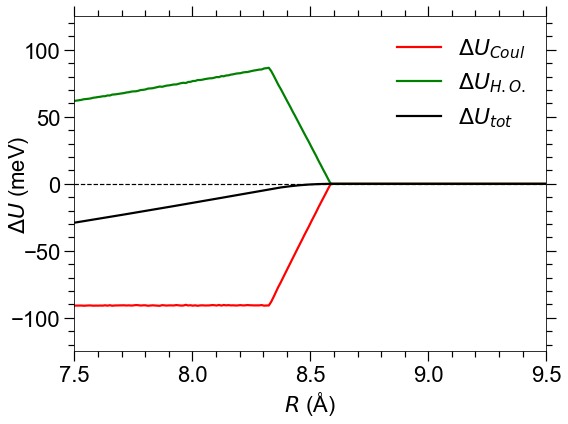

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax.plot(Rs, (coulomb_ex-coulomb_gs)/meV, 'r', label='$\Delta U_{Coul}$', lw=2.2)
ax.plot(Rs, (harmonic_ex-harmonic_gs)/meV, 'g', label='$\Delta U_{H.O.}$', lw=2.2)
ax.plot(Rs, (harmonic_ex-harmonic_gs+coulomb_ex-coulomb_gs)/meV, 'k', label='$\Delta U_{tot}$', lw=2.2)
ax.hlines(0, 7.5, 9.5, lw=1.2, ls='--')


ax.tick_params(which='major', axis='both', length=10, width=1.2)
ax.tick_params(which='minor', axis='both', length=6, width=1.2)

ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_xlim([7.5, 9.5])
ax.set_ylim([-125, 125])
ax.set_xlabel('$R$ (Å)')
ax.set_ylabel('$\Delta U$ (meV)',labelpad=-20)
ax.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 1))
plt.tight_layout()

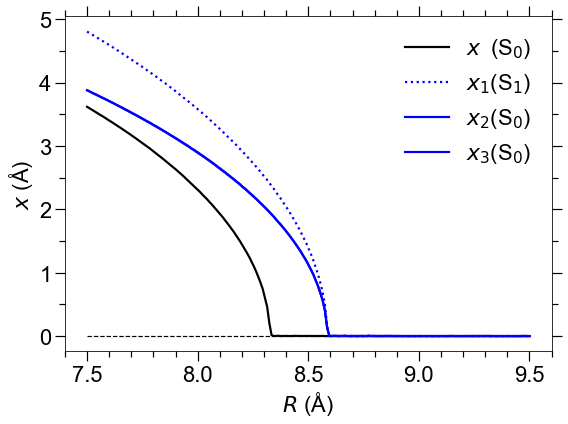

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

ax.plot(Rs, np.abs(x1_gs), 'k', label='$x~\,$(S$_0$)', lw=2.2)
ax.plot(Rs, np.abs(x1_ex), 'b:', label='$x_1$(S$_1$)', lw=2.2)
ax.plot(Rs, np.abs(x2_ex), 'b', label='$x_2$(S$_0$)', lw=2.2)
ax.plot(Rs, np.abs(x3_ex), 'b', label='$x_3$(S$_0$)', lw=2.2)
ax.hlines(0, 7.5, 9.5, lw=1.2, ls='--')


ax.tick_params(which='major', axis='both', length=10, width=1.2)
ax.tick_params(which='minor', axis='both', length=6, width=1.2)

ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))


ax.set_xlabel('$R$ (Å)')
ax.set_ylabel('$x$ (Å)')
ax.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 1))
fig.tight_layout()

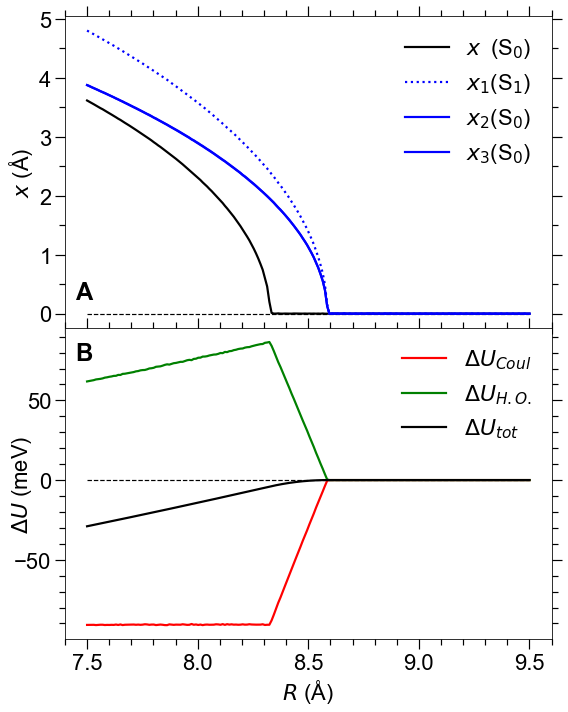

In [8]:
## xs and DeltaU panels
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 1], "hspace": 0.0})
plt.subplots_adjust(hspace=0)
fig.set_size_inches(8, 10)
ax1, ax2 = axs[0], axs[1]

ax1.plot(Rs, np.abs(x1_gs), 'k', label='$x~\,$(S$_0$)', lw=2.2)
ax1.plot(Rs, np.abs(x1_ex), 'b:', label='$x_1$(S$_1$)', lw=2.2)
ax1.plot(Rs, np.abs(x2_ex), 'b', label='$x_2$(S$_0$)', lw=2.2)
ax1.plot(Rs, np.abs(x3_ex), 'b', label='$x_3$(S$_0$)', lw=2.2)
ax1.hlines(0, 7.5, 9.5, lw=1.2, ls='--')

ax2.plot(Rs, (coulomb_ex-coulomb_gs)/meV, 'r', label='$\Delta U_{Coul}$', lw=2.2)
ax2.plot(Rs, (harmonic_ex-harmonic_gs)/meV, 'g', label='$\Delta U_{H.O.}$', lw=2.2)
ax2.plot(Rs, (harmonic_ex-harmonic_gs+coulomb_ex-coulomb_gs)/meV, 'k', label='$\Delta U_{tot}$', lw=2.2)
ax2.hlines(0, 7.5, 9.5, lw=1.2, ls='--')

ax1.set_ylabel('$x$ (Å)')
ax2.set_ylabel('$\Delta U$ (meV)', labelpad=-20)
ax2.set_xlabel('$R$ (Å)')

for ax, xtick, ytick in ((ax1, 0.1, 0.5), (ax2, 0.1, 10)):
    ax.xaxis.set_minor_locator(MultipleLocator(xtick))
    ax.yaxis.set_minor_locator(MultipleLocator(ytick))
    ax.tick_params(which='major', axis='both', length=10, width=1.2)
    ax.tick_params(which='minor', axis='both', length=6, width=1.2)
    ax.legend(loc='upper right', frameon=False)


# A and B
ax1.text(7.45, 0.25, 'A', fontsize=24, fontweight='bold')
ax2.text(7.445, 75, 'B', fontsize=24, fontweight='bold')

fig.tight_layout()

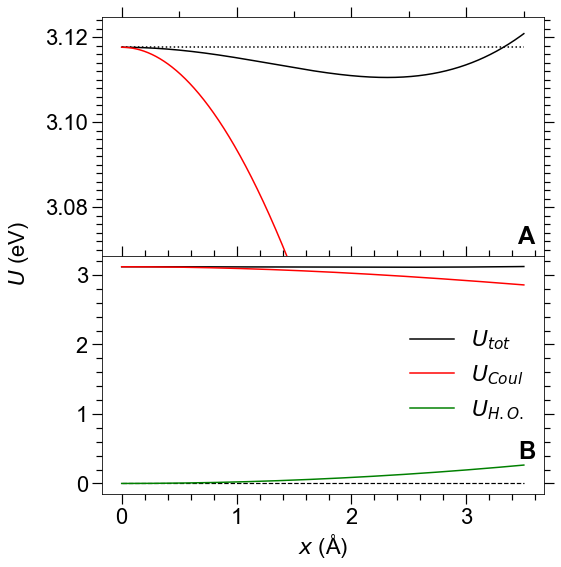

In [11]:
R = 8
xs = np.linspace(0, 3.5, 1000)
ds = d12(R, xs, xs)

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 1], "hspace": 0.0})
ax1, ax2 = axs

ax1.plot(xs, total_potential_energy((xs, xs, xs), alpha0, alpha0, alpha0, R)/eV, 'k', label='$U_{tot}$')
ax1.plot(xs, coulomb(ds, ds, ds)/eV, 'r', label='$U_{Coul}$')
ax1.hlines(coulomb(ds[0], ds[0], ds[0])/eV, 0, 3.5, ls=':')

ax2.plot(xs, total_potential_energy((xs, xs, xs), alpha0, alpha0, alpha0, R)/eV, 'k', label='$U_{tot}$')
ax2.plot(xs, coulomb(ds, ds, ds)/eV, 'r', label='$U_{Coul}$')
ax2.plot(xs, total_harmonic_energy((xs, xs, xs), alpha0, alpha0, alpha0)/eV, 'g', label='$U_{H.O.}$')
ax2.hlines(0, 0, 3.5, ls='--', lw=1.2)


ax1.tick_params(which='major', axis='both', length=10, width=1.2)
ax1.tick_params(which='minor', axis='both', length=6, width=1.2)
ax1.yaxis.set_minor_locator(MultipleLocator(.002))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))

ax2.tick_params(which='major', axis='both', length=10, width=1.2)
ax2.tick_params(which='minor', axis='both', length=6, width=1.2)
ax2.yaxis.set_minor_locator(MultipleLocator(.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.2))

ax1.set_ylim([0.2131/eV, 0.217/eV])
ax2.set_xlabel('$x$ (Å)')
fig.text(0.02, 0.6, '$U$ (eV)', va='center', rotation='vertical', fontsize=22)
ax2.legend(loc='center right', frameon=False)

ax1.text(3.45, 0.2133/eV, 'A', fontsize=24, fontweight='bold')
ax2.text(3.45, 0.35, 'B', fontsize=24, fontweight='bold')

plt.tight_layout()
fig.set_size_inches(8, 10)

GS: R=8 Å, minimum energy @ x=2.31 Å

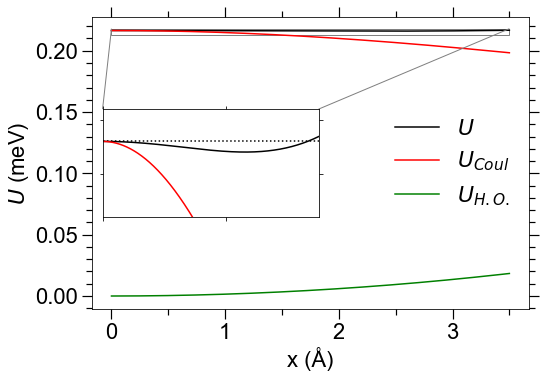

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

R = 8
xs = np.linspace(0, 3.5, 1000)
ds = d12(R, xs, xs)

fig, ax = plt.subplots(1, 1)

ax.plot(xs, total_potential_energy((xs, xs, xs), alpha0, alpha0, alpha0, R), 'k', label='$U$')
ax.plot(xs, coulomb(ds, ds, ds), 'r', label='$U_{Coul}$')

ax.plot(xs, total_harmonic_energy((xs, xs, xs), alpha0, alpha0, alpha0), 'g', label='$U_{H.O.}$')

ax.tick_params(which='major', axis='both', length=10, width=1.2)
ax.tick_params(which='minor', axis='both', length=6, width=1.2)

ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax.hlines(coulomb(ds[0], ds[0], ds[0]), 0, 3.5, ls=':')

# ax.set_ylim([0, 0.217])
ax.set_xlabel('x (Å)')
ax.set_ylabel('$U$ (meV)')
ax.legend(loc='middle right', frameon=False)


# Make the zoom-in plot:
axins = inset_axes(ax, width=3, height=1.5, loc=6)
axins.plot(xs, total_potential_energy((xs, xs, xs), alpha0, alpha0, alpha0, R), 'k')
axins.hlines(coulomb(ds[0], ds[0], ds[0]), 0, 3.5, ls=':')
axins.plot(xs, coulomb(ds, ds, ds), 'r', label='$U_{Coul}$')
axins.set_xlim(0, 3.5)
axins.set_ylim(0.213, 0.218)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=1, fc="none", ec="0.5")

plt.tight_layout()
fig.set_size_inches(8, 6)
# plt.savefig('trimer figs/R8 gs potentials w zoom v2.pdf')